In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

## 第1題


w: [-0.7312715117751976, 0.8474337369372327]
b: [0.2550690257394217, 0.763774618976614]
Data set: [[-0.09129825816118142, -1.010178704225238], [3.031859454455258, 5.7744670227102635], [-8.122808264515303, -9.433050469559873], [6.715302078397393, -1.344658641898933], [5.245601649158839, -9.957878932977787], [-1.092256118903972, 4.430800646815651], [-5.424755574590947, 8.905413911078448], [8.028549152229672, -9.388200339328929], [-9.491082780130784, 0.8282494558699316], [8.782983255570212, -2.375915246235751], [-5.668012057387733, -1.5576684883456533], [-9.419184248502642, -5.566166674539299], [-1.2422481269885584, -0.0837551723629879], [-5.338310994848547, -5.382669169180314], [-5.624379253246228, -0.8079306852453279], [-4.204367708190288, -9.570205894681823], [6.751559513251458, 1.129086453048668], [2.8458872586489115, -6.281874682105646], [9.850868243521301, 7.198930575905798], [-7.582200803883872, -3.3460962927974176]]
label: [-1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -

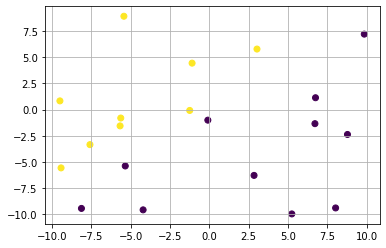

In [ ]:
# ---Generate data set---
random.seed(1) # 隨機種子序號
n, m = 20, 2 # 資料數量與維度
w = [-1 + 2*random.random(), random.random()]
b = [random.random(), random.random()]
b.sort()

i = 0
dataPointSet = []
label = []
while i < n:
    dataPointSet.append([])
    for j in range(m):
        dataPointSet[-1].append(-10 + random.random()*20)
    x = dataPointSet[-1]
    if w[0]*x[0] + w[1]*x[1] >= b[1]:
        label.append(1)
        i+=1
    elif w[0]*x[0] + w[1]*x[1] <= b[0]:
        label.append(-1)
        i+=1
    else:
        dataPointSet.remove(x)

print("w:", w)
print("b:", b)
print("Data set:",dataPointSet)
print("label:",label)
dataPointSet = np.array(dataPointSet)
plt.scatter(dataPointSet[:,0], dataPointSet[:,1], c=label)
plt.grid()

In [ ]:
# ---IPM for SVM---
def determineStepSize(x,d,r):
    n = len(d)
    stepSize = float("inf")
    for i in range(n):
        if d[i] < 0 and stepSize > -x[i]/d[i]:
            stepSize = -x[i]/d[i]
    stepSize = min([1,r*stepSize])
    return stepSize

def objEfficient(x, number_w, C, number_xi):
    c = []
    for i in range(number_w): 
        c.append(x[2*i, 0] - x[2*i+1, 0])
        c.append(-(x[2*i, 0] - x[2*i+1, 0]))
    c.append(0) # ba
    c.append(0) # bb
    for i in range(number_xi): # data point
        c.append(C)
    while len(c) < x0.shape[0]: # surplus variable
        c.append(0)
    return np.array([c]).T

def IPM(A, b, x0, y0, s0, dim=2, C=1, r=0.6, epsilon=1e-6, mu_0=10, mu_Method=None, max_iter=10000, show_mu=False, show_dualityGap=False):
    m, n = A.shape
    mu = [mu_0]
    e = np.ones([n, 1])
    c = objEfficient(x0, dim, C, m)
    
    k=0
    while k < max_iter: # while mu[k] > epsilon*mu_0:
        X = np.diag(x0[:,0])
        S = np.diag(s0[:,0])
        r1 = b-A.dot(x0)
        r2 = c-A.transpose().dot(y0)-s0
        r3 = mu[k]*e-X.dot(S).dot(e)
        residual = np.vstack([r1, r2, r3])
        A1 = np.hstack([A, np.zeros([m,m]), np.zeros([m,n])])
        A2 = np.hstack([np.zeros([n,n]), A.transpose(), np.identity(n)])
        A3 = np.hstack([S, np.zeros([n,m]), X])
        barA = np.vstack([A1, A2, A3])
        NewtonDirection = np.linalg.inv(barA).dot(residual)
        delta_x = NewtonDirection[0:n,0].reshape(n,1)
        delta_y = NewtonDirection[n:n+m,0].reshape(m,1)
        delta_s = NewtonDirection[n+m:2*n+m,0].reshape(n,1)
        stepSizeX = determineStepSize(x0, delta_x, r)
        stepSizeS = determineStepSize(s0, delta_s, r)
        x0 = x0+stepSizeX*delta_x
        y0 = y0+stepSizeS*delta_y
        s0 = s0+stepSizeS*delta_s
        
        c = objEfficient(x0, dim, C, m)

        if(mu_Method):
            mu.append(mu_Method(mu[k], x0, s0, k))
        else:
            mu.append((1/10)*x0.transpose().dot(s0)/n)
            
        primal = np.linalg.norm(A.dot(x0) - b)
        dual = np.linalg.norm(A.T.dot(y0) + s0 - c)
        gap = x0.transpose().dot(s0)[0,0]
        
        print("\riteration", k, end=", ")
        for i in range(dim):
            print(f"w{i+1}: {x0[2*i, 0] - x0[2*i+1, 0]}", end=", ")
        print(f"b: {x0[2*dim, 0] - x0[2*dim+1, 0]}", end="")
        
        if(show_mu):
            print("\ncurrent µ is", mu[-1], "\n")
            
        if(show_dualityGap):
            if(k%10==0):
                print("primal:", primal)
                print("dual:", dual)
                print("gap:", gap, "\n")
        
        if(primal <= epsilon and dual <= epsilon and gap <= epsilon):
            break

        k+=1
    
    if(show_dualityGap):
        print("primal:", primal)
        print("dual:", dual)
        print("gap:", gap)

    return x0

In [ ]:
# ---Setup---
m, n = 20, 46
dim = 2 #dimension

# ---variables---
np.random.seed(1)
x0 = np.random.rand(n, 1)
y0 = np.ones((m, 1))
s0 = np.ones((n, 1))

# ---constraints---
A = np.zeros((m, n))
for i in range(m):
    temp = []
    for j in range(dim):
        temp.append(dataPointSet[i,j])
        temp.append(-dataPointSet[i,j])
    temp.append(1)
    temp.append(-1)
    A[i,0:dim*2+2] = np.array(temp)*label[i]
    A[i,2+dim*2+i] = 1
    A[i,2+dim*2+m+i] = -1
B = np.ones((m, 1))

### (b)

In [ ]:
# 1st method
def mu1(mu, x, s, k):
    return mu * (1/2)**k
print('(1) µ = (1/2)**k')
IPM(A, B, x0, y0, s0, mu_Method=mu1, max_iter=5, show_mu=True)

# 2nd method
def mu2(mu, x, s, k):
    return mu * (1 - 1/(10*math.sqrt(2)))**k
print('\n(2) µ = (1 - 1/(10*math.sqrt(2)))**k')
IPM(A, B, x0, y0, s0, mu_Method=mu2, max_iter=5, show_mu=True)

# 3rd method
def mu3(mu, x, s, k):
    return (x.transpose().dot(s)[0,0]/2/10)
print('\n(3) µ = x.transpose().dot(s)/2/10')
a = IPM(A, B, x0, y0, s0, mu_Method=mu3, max_iter=5, show_mu=True)

(1) µ = (1/2)**k
iteration 0, w1: -0.14255595450003078, w2: 0.1555629335117672, b: 0.14165488571269336
current µ is 10.0 

iteration 1, w1: -1.3280154555031274, w2: 1.31918433213594, b: 0.38233303323993084
current µ is 5.0 

iteration 2, w1: -3.0197517311622093, w2: 3.157364790852064, b: 0.11855858500882022
current µ is 1.25 

iteration 3, w1: -3.536462055843053, w2: 3.783128741102196, b: -0.6923378039248362
current µ is 0.15625 

iteration 4, w1: -3.240586524889302, w2: 3.4901537196170054, b: -1.1725519568822378
current µ is 0.009765625 


(2) µ = (1 - 1/(10*math.sqrt(2)))**k
iteration 0, w1: -0.14255595450003078, w2: 0.1555629335117672, b: 0.14165488571269336
current µ is 10.0 

iteration 1, w1: -1.3280154555031274, w2: 1.31918433213594, b: 0.38233303323993084
current µ is 9.292893218813452 

iteration 2, w1: -3.4560255711522174, w2: 3.5979393781996194, b: 0.18004098630127885
current µ is 8.025144122534424 

iteration 3, w1: -6.423398232459078, w2: 6.8289653104735635, b: -1.482082859

### (c)

In [ ]:
result = IPM(A, B, x0, y0, s0, C=1, mu_Method=mu1, max_iter=100, show_dualityGap=True)

iteration 0, w1: -0.14255595450003078, w2: 0.1555629335117672, b: 0.14165488571269336primal: 1.3139038035509534e-13
dual: 111.79392354841069
gap: 433.54118815579807 

iteration 10, w1: -0.9005743646333499, w2: 1.0718570073037696, b: -0.10366710094508846primal: 7.098589148347291e-11
dual: 0.5261728767767827
gap: 1.1139423498313294 

iteration 20, w1: -0.8835063772909351, w2: 1.0604950745911097, b: -0.009190927616536726primal: 3.624029528178107e-09
dual: 0.0032675374623926195
gap: 0.0005569312480643406 

iteration 30, w1: -0.8839140825707688, w2: 1.0607018186305908, b: -0.00920140639711775primal: 6.445317747619281e-09
dual: 1.47443083907729e-06
gap: 6.104149060311241e-08 

iteration 31, w1: -0.8839141110692097, w2: 1.060701833648153, b: -0.009201406438087645primal: 1.984405187069263e-09
dual: 6.353173346667221e-07
gap: 2.4416694265263562e-08


### (d)

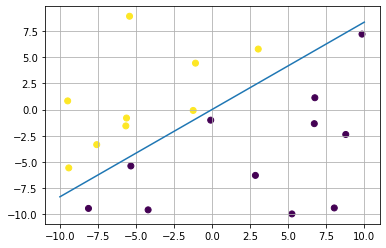

In [ ]:
w1 = result[0, 0] - result[1, 0]
w2 = result[2, 0] - result[3, 0]
b = result[4, 0] - result[5, 0]

x_1 = [-10, 10]
x_2 = []
for i in x_1:
    x_2.append((-b-w1*i)/w2)

plt.scatter(dataPointSet[:,0], dataPointSet[:,1], c=label)
plt.plot(x_1, x_2)
plt.grid()

## 第2題

In [ ]:
def determineStepSize(x,d,r):
    n=len(d)
    stepSize=float("inf")
    for i in range(n):
        if d[i] < 0 and stepSize > -x[i]/d[i]:
            stepSize = -x[i]/d[i]
    stepSize = min([1,r*stepSize])
    return stepSize

def IPM(A, b, c, x0, y0, s0, r=0.6, epsilon=1e-8, mu_0=10, max_iter=10000):
    m, n = A.shape
    mu = [mu_0]
    e = np.ones((n, 1))
    k=0
    while k < max_iter: #while mu[k] > epsilon*mu_0:
        X = np.diag(x0[:,0])
        S = np.diag(s0[:,0])
        r1 = b-A.dot(x0)
        r2 = c-A.transpose().dot(y0)-s0
        r3 = mu[k]*e-X.dot(S).dot(e)
        residual = np.vstack((r1,r2,r3))
        A1 = np.hstack((A,np.zeros((m,m)),np.zeros((m,n))))
        A2 = np.hstack((np.zeros((n,n)),A.transpose(),np.identity(n)))
        A3 = np.hstack((S,np.zeros((n,m)),X))
        barA = np.vstack((A1,A2,A3))
        NewtonDirection = np.linalg.inv(barA).dot(residual)
        delta_x = NewtonDirection[0:n,0].reshape(n,1)
        delta_y = NewtonDirection[n:n+m,0].reshape(m,1)
        delta_s = NewtonDirection[n+m:2*n+m,0].reshape(n,1)
        stepSizeX = determineStepSize(x0,delta_x,r)
        stepSizeS = determineStepSize(s0,delta_s,r)
        x0 = x0+stepSizeX*delta_x
        y0 = y0+stepSizeS*delta_y
        s0 = s0+stepSizeS*delta_s
        mu.append((1/10)*x0.transpose().dot(s0)/n)
    return x0

In [ ]:
# ---setup---
m, n = 6, 8 
np.random.seed(1)
x0 = np.random.rand(n, 1)
y0 = np.ones((m, 1))
s0 = np.ones((n, 1))

sources = [[2, 300], [3, 200], [4, 100], [2, 200], [1, 400]]

# Constraints
A = []
for i in range(len(sources)):
    A.append(np.zeros([m, n]))
    A[i][0, 1] = sources[i][0]
    A[i][0, 2] = sources[i][1]
    for j in range(len(sources)):
        A[i][1+j, 0] = 1000
        A[i][1+j, 1] = -sources[j][0]
        A[i][1+j, 2] = -sources[j][1]
        A[i][1+j, 3+j] = 1
        
B = np.zeros([m, 1])
B[0, 0] = 1

# Objective
c = np.zeros([n, 1])
c[0, 0] = -1000

### (b)

In [ ]:
import pandas as pd
import IPython.display

dataForTable = {
    '大學': [],
    '相對效率': [],
    '效率評鑑參考集合': [],
}

effront = {}
xeffront = []
yeffront = []

other = {}
xother = []
yother = []

## Do IPM and save results
for i in range(len(A)):
    solution = IPM(A[i], B, c, x0, y0, s0)
    objective = solution[0,0] * 1000
    dataForTable['大學'].append(chr(65+i))
    dataForTable['相對效率'].append(round(objective, 3))
    if abs(objective - 1) < 1e-6:
        effront[chr(65+i)] = datas[i]
        xeffront.append(datas[i][0])
        yeffront.append(datas[i][1])
        dataForTable['效率評鑑參考集合'].append('無')
    else:
        other[chr(65+i)] = datas[i]
        xother.append(datas[i][0])
        yother.append(datas[i][1])
        dataForTable['效率評鑑參考集合'].append(None)
    print(f'Utility of College {chr(65+i)}: {objective:.3f}', )
    
    
    
## Calculate intersactions
intersaction = {}
for key in other.keys():
    vector = np.array(other[key])
    effkeys = [*effront.keys()]
    for i in range(len(xeffront) - 1):
        vector1 = np.array([xeffront[i], yeffront[i]])
        vector2 = np.array([xeffront[i+1], yeffront[i+1]])
        if(np.cross(vector, vector1) * np.cross(vector, vector2) < 0):
            intersaction[key] = {}
            vectorLen = np.linalg.norm(vector)
            point = (np.cross(vector1, vector2-vector1) / np.cross(vector, vector2-vector1)) * vector
            lenA = np.linalg.norm(point - vector1)
            lenB = np.linalg.norm(point - vector2)
            intersaction[key][effkeys[i]] = lenA / (lenA + lenB)
            intersaction[key][effkeys[i+1]] = lenB / (lenA + lenB)
            intersaction[key]['point'] = point
            
#print(intersaction)
            
## Save info of intersactions
temp = dataForTable['效率評鑑參考集合']
for i in range(len(temp)):
    if not temp[i]:
        refer = [*intersaction[chr(65+i)].keys()]
        refer.pop()
        temp[i] = ''
        for key in refer:
            temp[i] += f'{key}({intersaction[chr(65+i)][key]:.3f}) '
        temp[i] = temp[i].strip().replace(' ', '; ')
            
#print(dataForTable)

## Display table
table = pd.DataFrame(dataForTable)
table.head().style.hide_index()
display(table)


## Plot
plt.rcParams["figure.figsize"] = (6, 6)
plt.plot(xeffront, yeffront)
for key in effront.keys():
    point = (effront[key][0], effront[key][1])
    plt.text(0.1+point[0], point[1], s=f'{key} {point}')
    plt.scatter(point[0], point[1], c='b')
for key in other.keys():
    point = (other[key][0], other[key][1])
    plt.plot([0, point[0]], [0, point[1]])
    plt.text(0.1+point[0], point[1], s=f'{key} {point}')
    plt.scatter(point[0], point[1], c='g')
for key in intersaction.keys():
    point = tuple(intersaction[key]['point'])
    plt.text(0.15+point[0], point[1], s=f'{key}\' ({point[0]:.3f}, {point[1]:.3f})')
    plt.scatter(point[0], point[1], c='r')
plt.grid()

KeyboardInterrupt: ignored